<i> Adapted for Chalab by Isabelle Guyon from original code of Balázs Kégl (LAL/CNRS)</i>

ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 

## Introduction

Starting kit for the challenge Pick The Sneak Peek. This challenge consists in finding the types of some movies based on their summary.

In [1]:
# le répertoire où se trouve le code
codedir = 'sample_code/' 

# on ajoute au python path(qui indique à python quels dossiers il soit prendre en compte dans sa recherche de modules)
# le répertoire contenant les données
from sys import path; path.append(codedir)

# %matplotlib performs the necessary behind-the-scenes setup for IPython to work correctly hand in hand with matplotlib
# inline :  The resulting plots will then also be stored in the notebook document
%matplotlib inline

# pandas = bibliothèque pour manipuler facilement des données
import pandas as pd

# numpy = bibliothèque destinée à manipuler des matrices
import numpy as np

# tabulate = bibliothèque pour afficher de beaux tableaux
from tabulate import tabulate

# time = bibliothèque pour représenter et manipuler des temps : 
# par exemple time.time() donne le nombre de secondes écoulées depuis le 1er janvier 1970
from time import time

# matplotlib = bibliothèque pour créer des graphiques simplement
import matplotlib.pyplot as plt

## Fetch the data and load it

In [2]:
# répertoire où se trouvent les données
datadir = 'public_data/'    

# basename = tous les fichiers dans le dossier "public_data" donc le nom commence par "movies"
dataname = 'movies'
basename = datadir  + dataname

# affiche la liste de tous les fichiers que basename représente
!ls $basename*

public_data/movies_feat.name   public_data/movies_train.data
public_data/movies_label.name  public_data/movies_train.solution
public_data/movies_test.data   public_data/movies_valid.data


In [3]:
# Lecture des dataset

# os = bibliothèque dédiée au besoin de gestion de fichiers et de dossiers
import os

# le module sys contient des informations système
# sys.argv contient les arguments passés en ligne de commande
import sys
from sys import argv, path

# abspath prend un chemin qui peut être partiel ou même vide et retourne un chemin complet
# print run_dir : /home/user/Bureau/Miniprojet/starting_kit
run_dir = os.path.abspath(".")

# print lib_dir : /home/user/Bureau/Miniprojet/starting_kit/sample_code
lib_dir = os.path.join(run_dir, "sample_code")

# print res_dir : /home/user/Bureau/Miniprojet/starting_kit/res
res_dir = os.path.join(run_dir, "res")

# ajoute run_dir et lib_dir au chemin
path.append (run_dir)
path.append (lib_dir)

# datamanager = useful for locating the correct data file, load/save data and get info about them
import data_io                      
from data_io import vprint           
from data_manager import DataManager 
#import data_io                      
#from data_io import vprint           
#from data_manager import DataManager 
#from data_io import vprint           
#from data_manager import DataManager 
from classifier import Classifier     

max_samples = 50000

# input_dir = datadir = répertoire où se trouvent les données (public_data)
input_dir = datadir

# output_dir = repértoire res (dans le starting_kit)
output_dir = res_dir

# inventory data (and sort datasets names alphabetically)
datanames = data_io.inventory_data(input_dir)

# D = informations sur tous les fichiers et les données
for basename in datanames:
    D = DataManager(basename, input_dir, replace_missing=True, filter_features=True, max_samples=max_samples)

    """print D
    DataManager : movies
info:
	task = multilabel.classification
	valid_num = 3402
	has_categorical = 0
	feat_type = Mixed
	format = sparse
	metric = auc_metric
	target_type = Binary
	test_num = 5105
	label_num = 14
	target_num = 14
	train_num = 25521
	has_missing = 0
	usage = No Info File
	feat_num = 102592
	time_budget = 600
	is_sparse = 1
	name = movies
data:
	X_train = array(25521, 102592)
	Y_train = array(25521, 14)
	X_valid = array(3402, 102592)
	X_test = array(5105, 102592)
feat_type:	array(102592,)
feat_idx:	array(102592,)"""

Info file NOT found : /root/Bureau/L2MI/MiniProjet/starting_kit/public_data/movies_public.info
Reading public_data/movies_train.data...
Converting {} to correct array
Converting public_data/movies_train.data to sparse list
Reading public_data/movies_test.data...
Converting {} to correct array
Converting public_data/movies_test.data to sparse list
Reading public_data/movies_valid.data...
Converting {} to correct array
Converting public_data/movies_valid.data to sparse list
Reading public_data/movies_train.data...
Converting {} to correct array
Converting public_data/movies_train.data to sparse list
	Converting sparse list to dok sparse matrix
	Converting dok sparse matrix to csr sparse matrix
Reading public_data/movies_valid.data...
Converting {} to correct array
Converting public_data/movies_valid.data to sparse list
	Converting sparse list to dok sparse matrix
	Converting dok sparse matrix to csr sparse matrix
Reading public_data/movies_test.data...
Converting {} to correct array
Conv

In [8]:
# Mise en place des différents datasets
X_train = D.data['X_train']
y_train = D.data['Y_train']
X_valid = D.data['X_valid']
X_test = D.data['X_test']

# Statistiques sur les données
# DataFrame is a 2-dimensional labeled data structure with columns of potentially different types
# peut être vu un peu comme une table SQL
# The shape attribute for numpy arrays returns the dimensions of the array. If Y has n rows and m columns, 
# then Y.shape is (n,m). So Y.shape[0] is n.
# df est donc le tableau représentant la taille des ensembles affiché ci-dessous
df = pd.DataFrame({'X_train': X_train.shape[0], 'X_valid': X_valid.shape[0], 'X_test': X_test.shape[0]}, index=['Taille'])
print "Taille des ensembles"
print tabulate(df, headers='keys', tablefmt='fancy_grid')
print
print("Proportion des labels dans l'ensemble d'entraînement: ")

# data = la somme des 1 dans chaque colonne de y_train (chaque colonne correspond à un genre de film)
# divisée par le nombre total de lignes dans y_train
# -> data contient les pourcentages des labels das l'ensemble d'entrainement
data = sum(y_train)*1/len(y_train)
list_genres = ["drama", "action", "adventure", "animation", "crime", "fantasy", "music", 
               "mystery", "science fiction", "sport", "thriller", "war", "western", "family film"]


# str convertit des données en chaine de caractères
df2 = pd.DataFrame({'drama': str(int(data[0]*100))+"%", 
                    'action': str(int(data[1]*100))+"%", 
                    'adventure': str(int(data[2]*100))+"%", 
                    'animation': str(int(data[3]*100))+"%", 
                    'crime': str(int(data[4]*100))+"%", 
                    'fantasy': str(int(data[5]*100))+"%", 
                    'music': str(int(data[6]*100))+"%", 
                    }
                   , index=['Proportion'])
print tabulate(df2, headers='keys', tablefmt='fancy_grid')

df3 = pd.DataFrame({'mystery': str(int(data[7]*100))+"%", 
                    'science fiction': str(int(data[8]*100))+"%", 
                    'sport': str(int(data[9]*100))+"%", 
                    'thriller': str(int(data[10]*100))+"%", 
                    'war': str(int(data[11]*100))+"%", 
                    'western': str(int(data[12]*100))+"%", 
                    'family film': str(int(data[13]*100))+"%"
                    } , index=['Proportion'])
print tabulate(df3, headers='keys', tablefmt='fancy_grid')

Taille des ensembles
╒════════╤══════════╤═══════════╤═══════════╕
│        │   X_test │   X_train │   X_valid │
╞════════╪══════════╪═══════════╪═══════════╡
│ Taille │     5105 │     25521 │      3402 │
╘════════╧══════════╧═══════════╧═══════════╛

Proportion des labels dans l'ensemble d'entraînement: 
╒════════════╤══════════╤═════════════╤═════════════╤═════════╤═════════╤═══════════╤═════════╕
│            │ action   │ adventure   │ animation   │ crime   │ drama   │ fantasy   │ music   │
╞════════════╪══════════╪═════════════╪═════════════╪═════════╪═════════╪═══════════╪═════════╡
│ Proportion │ 20%      │ 18%         │ 7%          │ 15%     │ 58%     │ 6%        │ 8%      │
╘════════════╧══════════╧═════════════╧═════════════╧═════════╧═════════╧═══════════╧═════════╛
╒════════════╤═══════════════╤═══════════╤═══════════════════╤═════════╤════════════╤═══════╤═══════════╕
│            │ family film   │ mystery   │ science fiction   │ sport   │ thriller   │ war   │ western   │
╞

In [31]:
# df est le fichier movies_train représenté sous la forme d'un tableau avec : 
# colonnes = noms des genres de films
# lignes = un exemple de l'ensemble d'entrainement (les x_train)
# une case = 1 si cet exemple correspond à un film de cette catégorie
df = pd.DataFrame(y_train, columns=list_genres)
#df.head(5)
print(list_genres)

['drama', 'action', 'adventure', 'animation', 'crime', 'fantasy', 'music', 'mystery', 'science fiction', 'sport', 'thriller', 'war', 'western', 'family film']


Corrélation entre les différents labels

In [32]:
# plus la valeur est proche de 1 plus les genres sont liés
# plus la valeur est proche de -1, plus les genres sont opposés
corr = df.corr(method='pearson', min_periods=1)
corr

,drama,action,adventure,animation,crime,fantasy,music,mystery,science fiction,sport,thriller,war,western,family film
drama,1.000000,-0.208763,-0.216760,-0.284272,0.023972,-0.128555,-0.044000,-0.035807,0.112253,-0.217192,-0.129986,0.058990,-0.095585,-0.180439
action,-0.208763,1.000000,0.578831,-0.070015,0.124419,0.021983,-0.099546,-0.040360,-0.136960,0.093208,0.178177,0.069429,0.188844,-0.083790
adventure,-0.216760,0.578831,1.000000,0.026332,0.052679,0.171581,-0.072731,-0.043965,-0.140764,0.122684,0.103371,0.047052,0.185662,0.100328
animation,-0.284272,-0.070015,0.026332,1.000000,-0.111831,0.161829,0.015435,-0.057264,-0.116972,0.028903,-0.125845,-0.052674,-0.031549,0.403996
crime,0.023972,0.124419,0.052679,-0.111831,1.000000,-0.087965,-0.083814,0.263243,-0.117597,-0.078899,0.369932,-0.071445,-0.038581,-0.118376
fantasy,-0.128555,0.021983,0.171581,0.161829,-0.087965,1.000000,-0.000447,-0.012425,-0.030846,0.130139,-0.055951,-0.040657,-0.040962,0.188094
music,-0.044000,-0.099546,-0.072731,0.015435,-0.083814,-0.000447,1.000000,-0.059403,0.093272,-0.058541,-0.106995,-0.045394,-0.030902,0.020607
mystery,-0.035807,-0.040360,-0.043965,-0.057264,0.263243,-0.012425,-0.059403,1.000000,-0.069484,-0.012411,0.335055,-0.046197,-0.039035,-0.062948
science fiction,0.112253,-0.136960,-0.140764,-0.116972,-0.117597,-0.030846,0.093272,-0.069484,1.000000,-0.104496,-0.161217,-0.023264,-0.046750,-0.100284
sport,-0.217192,0.093208,0.122684,0.028903,-0.078899,0.130139,-0.058541,-0.012411,-0.104496,1.000000,0.066996,-0.046744,-0.031165,-0.007743


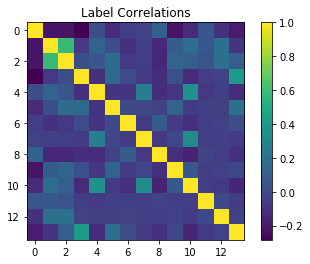

In [33]:
# heatmap de la matrice de correlation
matrix = corr.values
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(matrix, interpolation='nearest', label = list_genres)
plt.colorbar()
plt.title('Label Correlations')
plt.show()

# Scores with random techniques

In [34]:
# sklearn.metrics.f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None) 
# calcule le f1 score 
# y_true = true positives
# y_pred = predicted positives
from sklearn.metrics import f1_score

print('Random Technique 1 : ')
# np.zeros(x, y) renvoie une matrice de taille x*y dont toutes les cases valent 0
# y_pred est donc le même tableau que y_train avec des 0 partout
y_pred = np.zeros(y_train.shape)
for i in range(len(data)):
    if data[i] > 0.5:
        # y_pred[:,i] = toutes les lignes de la colonne d'indice i
        # np.ones(x, y) renvoie une matrice de taille x*y dont toutes les cases valent 1
        y_pred[:,i] = np.ones(y_pred.shape[0])
# ici ce qu'on fait c'est qu'on crée le tableau de prédiction des classes y_pred;
# tout d'abord en le mettant partout à 0, ensuite : 
# on connait dans data la proportion de films qui sont de chaque genre (dans data)
# on suppose donc que si data[i] > 0.5 un film a plus de chances d'être dans cette catégorie i que de ne pas y être
# on met donc dans la colonne correspondant à la catégorie i des 1 partout
# en gros, pour y_pred, on dira que :
# si pour une catégorie i, data[i] > 0.5, on prédira que tous les films appartiennent à cette catégorie
# sinon on prédira qu'aucun film n'appartiennent à cette catégorie

# ici "metrics" désignera plus ou moins le pourcentage d'erreur  

# micro : Calculate metrics globally by counting the total true positives, false negatives and false positives.
f1_micro = f1_score(y_train, y_pred, average="micro")

# macro : Calculate metrics for each label, and find their unweighted mean. 
# This does not take label imbalance into account.
f1_macro = f1_score(y_train, y_pred, average="macro")

# weighted : Calculate metrics for each label, and find their average, weighted by support 
# (the number of true instances for each label)
# -> comme macro sauf qu'on tient compte du label imbalance
f1_weighted = f1_score(y_train, y_pred, average="weighted")

# samples : Calculate metrics for each instance, and find their average
f1_samples = f1_score(y_train, y_pred, average="samples")
    
print('F1-Score with micro compute: {0}'.format(f1_micro))
print('F1-Score with macro compute: {0}'.format(f1_macro))
print('F1-Score with weighted compute: {0}'.format(f1_weighted))
print('F1-Score with samples compute: {0}'.format(f1_samples))

print('\nRandom Technique 2 :')
y_pred = np.zeros(y_train.shape)
for j in range(y_train.shape[1]):
    # np.random.uniform (low, high, size) -> draw samples from a uniform distribution -> nombres aléatoires
    inter = np.random.uniform(0,1,size = y_train.shape[0])
    inter = [ 1 if inter[i] > data[j] else 0 for i in range(y_train.shape[0])]
    y_pred[:,j] = inter
    # ici y_pred[i] = 1 si un le nombre aléatoire est supérieur à data[i]

f1_micro = f1_score(y_train, y_pred, average="micro")
f1_macro = f1_score(y_train, y_pred, average="macro")
f1_weighted = f1_score(y_train, y_pred, average="weighted")
f1_samples = f1_score(y_train, y_pred, average="samples")

print('F1-Score with micro compute: {0}'.format(f1_micro))
print('F1-Score with macro compute: {0}'.format(f1_macro))
print('F1-Score with weighted compute: {0}'.format(f1_weighted))
print('F1-Score with samples compute: {0}'.format(f1_samples))

Random Technique 1 : 
F1-Score with micro compute: 0.382558649702
F1-Score with macro compute: 0.0524878898615
F1-Score with weighted compute: 0.209577893903
F1-Score with samples compute: 0.4216702647

Random Technique 2 :
F1-Score with micro compute: 0.212364658329
F1-Score with macro compute: 0.212403429838
F1-Score with weighted compute: 0.312121849991
F1-Score with samples compute: 0.201526085568


### Building a predictive model

The initial classifier in your starting kit (in the sample_code directory).

In [35]:
import classifier

# If you make changes to your code you have to reload it
reload(classifier) 

from classifier import Classifier
Classifier??

Train, run, and save your classifier and your predictions. If you saved a trained model and/or prediction results, the evaluation script will look for those and use those in priority [(1) use saved predictions; (2) if no predictions, use saved model, do not retrain, just test; (3) if neither, train and test model from scratch]. Compute the predictions with predict_proba, this is more versatile.

In [36]:
result_dir = 'res/'

# outname = res/movies
outname = result_dir + dataname

clf = Classifier()
clf.fit(X_train, y_train)
Y_valid = clf.predict(X_valid) 
Y_test = clf.predict(X_test) 
clf.save(outname)
clf.load(outname)
data_io.write(outname + '_valid.predict', Y_valid)
data_io.write(outname + '_test.predict', Y_test)
!ls $outname*

res/movies_model.pickle  res/movies_test.predict  res/movies_valid.predict


Compute the training accuracy.

In [27]:
from sklearn.cross_validation import train_test_split
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size = 0.4, random_state = 0)
def benchmark(clf, name):
    t0 = time()
    pred = clf.predict(X_valid)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)
    
    f1_micro = f1_score(y_valid, pred, average="micro")
    f1_macro = f1_score(y_valid, pred, average="macro")
    f1_weighted = f1_score(y_valid, pred, average="weighted")
    f1_samples = f1_score(y_valid, pred, average="samples")
    
    print('F1-Score with micro compute: {0}'.format(f1_micro))
    print('F1-Score with macro compute: {0}'.format(f1_macro))
    print('F1-Score with weighted compute: {0}'.format(f1_weighted))
    print('F1-Score with samples compute: {0}'.format(f1_samples))
    print "\n"
    print classification_report(y_valid, pred, target_names=list_genres)
    
    return name, f1_micro, f1_macro, f1_weighted, f1_samples

results = []

In [28]:
from sklearn.metrics import f1_score, classification_report
# Directly predicts the (categorical) class labels              
class_labels = clf.get_classes()     
print 'Class labels=', class_labels

AttributeError: 'LinearRegression' object has no attribute 'classes_'

Compute F1 scores

In [29]:
clf = Classifier()
clf.fit(X_training, y_training)
results.append(benchmark(clf, 'bernoulli - alpha - 0.005'))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

Plot F1 scores

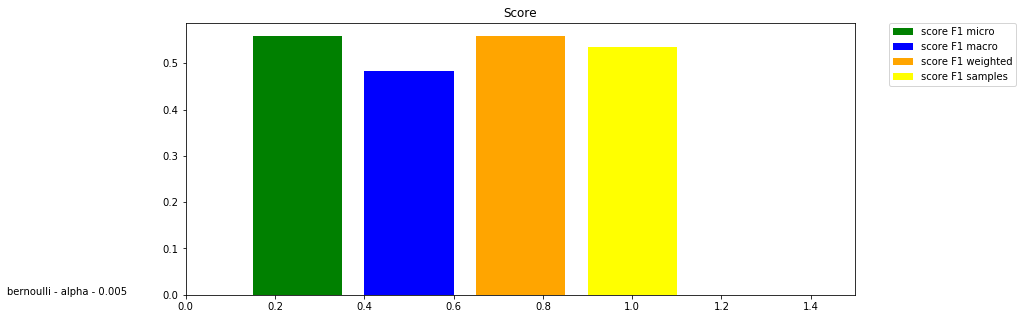

In [20]:
indices = np.arange(len(results))
results_final = [[x[i] for x in results] for i in range(5)]
clf_names, f1_micro, f1_macro, f1_weighted, f1_samples = results_final
width = 0.25
fig = plt.figure(figsize=(12, 5))
s = fig.add_subplot(111)
plt.title("Score")
s.bar(indices + width, f1_micro, .2, label="score F1 micro", color='green')
s.bar(indices + 2*width, f1_macro, .2, label="score F1 macro", color='blue')
s.bar(indices + 3*width, f1_weighted, .2, label="score F1 weighted", color='orange')
s.bar(indices + 4*width, f1_samples, .2, label="score F1 samples", color='yellow')
s.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
s.set_xlim(0, 1.5)

for i, c in zip(indices, clf_names):
    plt.text(-.4, i, c)

plt.show()

ADVANCED: Sklearn does not have multi-class metrics, this shows how libscore metrics work.

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>classifier.py</code> in the <code>sample_code/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission.  The program looks for saved results and saved models in the subdirectory <code>res/</code>. If it finds them, it will use them: (1) If results are found, then are copied to the output directory; (2) If no results but a trained model is found, it is reloaded and no training occurs; (3) If nothing is found a fresh model is trained and tested.

In [21]:
outdir = './res'         # If you use result_dir as output directory, your submission will include your results

In [22]:
!python run.py $datadir $outdir

Traceback (most recent call last):
  File "run.py", line 134, in <module>
    import data_io# general purpose input/output functions
  File "/root/Bureau/L2MI/MiniProjet/starting_kit/sample_code/data_io.py", line 25, in <module>
    import pandas as pd
ImportError: No module named pandas


## Making your submission

The test program <code>run.py</code> prepares your <code>zip</code> file, ready to go. You find it in the directory above where you ran your program. For large datasets, we recommend that <b><span style="color:red">you do NOT bundle the data with your submission</span></b>. The data directory is passed as an argument to run.py, and it is already there on the test server.

In [23]:
from sklearn.utils import resample
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)

score = []
error_bars = []
labels = class_labels
for j in labels:
    clf = BernoulliNB(alpha = 0.005)
    clf.fit(X_training, y_training[:,j])
    for i in range(100):
        X_sub_test, y_sub_test = resample(X_valid, y_valid[:,j],replace=True)
        y_pred = clf.predict(X_sub_test)
        f1_weighted = f1_score(y_sub_test, y_pred, average = "binary")
        score.append(f1_weighted)
    print np.std(score)
    error_bars.append(np.std(score))

0.00412294607214
0.129498900938
0.12915469275
0.113077986576
0.104268521154
0.121165058151
0.133063549431
0.138624562497
0.130898712442
0.124444768428
0.118829463913
0.115140831822
0.110869179469
0.106933946659


0.772118787506
0.512330145949
0.480474542758
0.59173126615
0.498284145504
0.378650553877
0.333333333333
0.317002881844
0.520773344303
0.473568281938
0.484230955847
0.548
0.447876447876
0.46968238691


<Container object of 3 artists>

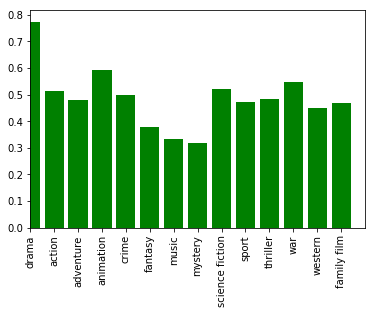

In [18]:
# Chain Classifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.cross_validation import train_test_split
from scipy import sparse
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

#order = [0,3,11,1,12,4,8,10,9,2,5,6,7]

labels = class_labels
scores = []
nb_ex = []
for i in range(len(class_labels)):
    y_training_1 = y_training[:,i]
    clf =  BernoulliNB(alpha = 0.005)
    clf.fit(X_training, y_training_1)
    pred = clf.predict(X_valid)
    f1 = f1_score(y_valid[:,i], pred, average="binary")
    scores.append(f1)
    nb_ex.append(len(y_training_1))
    print(f1)
    #X_training = sparse.hstack((X_training, y_training_1.reshape(len(y_training_1), 1)))
    #X_valid = sparse.hstack((X_valid, pred.reshape(len(pred), 1)))

scores = np.array(scores)
my_xticks = list_genres
plt.xticks(labels, my_xticks, rotation = 'vertical')
plt.xlim(0,14, 10)
plt.bar(labels, scores, color="green")
err = 0.1*np.ones(len(labels))
plt.errorbar(labels, scores, yerr=error_bars, fmt='none')
#nb_ex = np.array(nb_ex)
#wheighted_score = scores.dot(nb_ex)/(nb_ex.sum()*1.0)
#print("weighted_score : " + str(wheighted_score))

<Container object of 3 artists>

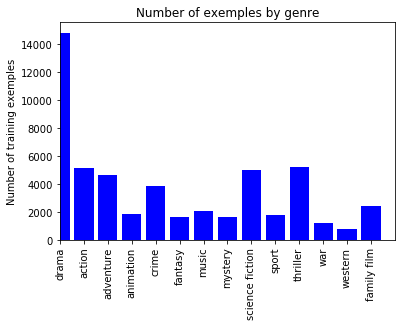

In [19]:
scores = y_train.sum(axis = 0)
n = len(scores)
mid = scores
my_xticks = list_genres
plt.xticks(labels, my_xticks, rotation = 'vertical')
plt.xlim(0,14, 10)
plt.title("Number of exemples by genre")
plt.ylabel('Number of training exemples')
plt.bar(labels, scores, color="blue")
plt.errorbar(5, n, yerr=0.01, fmt='none')

In [20]:
assoc = {}
assoc_inv = {}
count = 0
for i in range(y_train.shape[0]):
    if tuple(y_train[i]) not in assoc.keys():
        assoc[tuple(y_train[i])] = count
        assoc_inv[count] = y_train[i]
        count += 1
        


In [21]:
from sklearn.model_selection import learning_curve
clf = Classifier()
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5, scoring = 'f1_weighted', train_sizes = np.linspace(0.1, 1.0, 10))

[ 0.94361027  0.90968458  0.8902576   0.86972521  0.85275121  0.84047586
  0.8252417   0.81360785  0.80455537  0.79465139]
[ 0.46816208  0.51805096  0.53852334  0.54818432  0.55387326  0.55746502
  0.5578951   0.55713971  0.55849732  0.55862165]


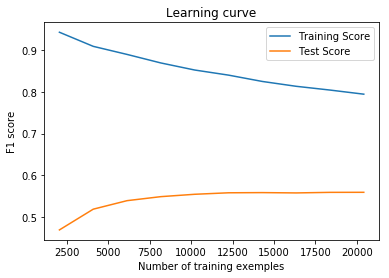

In [22]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.title('Learning curve')
plt.ylabel('F1 score')
plt.xlabel('Number of training exemples')
plt.plot(train_sizes, train_scores_mean, label = 'Training Score')
plt.plot(train_sizes, test_scores_mean, label = 'Test Score')
plt.legend()
print(train_scores_mean)
print(test_scores_mean)

In [23]:
from sklearn.feature_selection import chi2, SelectKBest
labels = range(y_train.shape[1])
selected_features = [] 
for label in labels:
    selector = SelectKBest(chi2, k='all')
    selector.fit(X_train, y_train[:,label])
    selected_features.append(list(selector.scores_))

threshold = 15000  
    
#MeanCS 
selected_features = np.mean(selected_features, axis=0) > threshold
#MaxCS
#selected_features = np.max(selected_features, axis=0) > threshold

/home/lena/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in greater


In [24]:
def feature_select(X, y):
    labels = range(y.shape[1])
    selected_features = [] 
    for label in labels:
        selector = SelectKBest(chi2, k='all')
        selector.fit(X, y[:,label])
        selected_features.append(list(selector.scores_))

    threshold = 15000  
    
    #MeanCS 
    selected_features = np.mean(selected_features, axis=0) > threshold
    return selected_features

In [25]:
X_train_select, X_valid, y_train2, y_valid = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)
selected_features = feature_select(X_train_select, y_train2)
X_train_select = X_train_select[:,selected_features]
X_valid = X_valid[:,selected_features]
clf = Classifier()
clf.fit(X_train_select, y_train2)
pred = clf.predict(X_valid)
f1_weighted = f1_score(y_valid, pred, average="weighted")
print(f1_weighted)

0.587576359946


/home/lena/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in greater


In [26]:
print(labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
